In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.21 GB, difference +0.21 GB
scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
#load data with leiden
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/bb1_bb2_leiden_1.4_sub_rec_log_norm_DGE_v1_95563x37733_240729_18h52.h5ad")

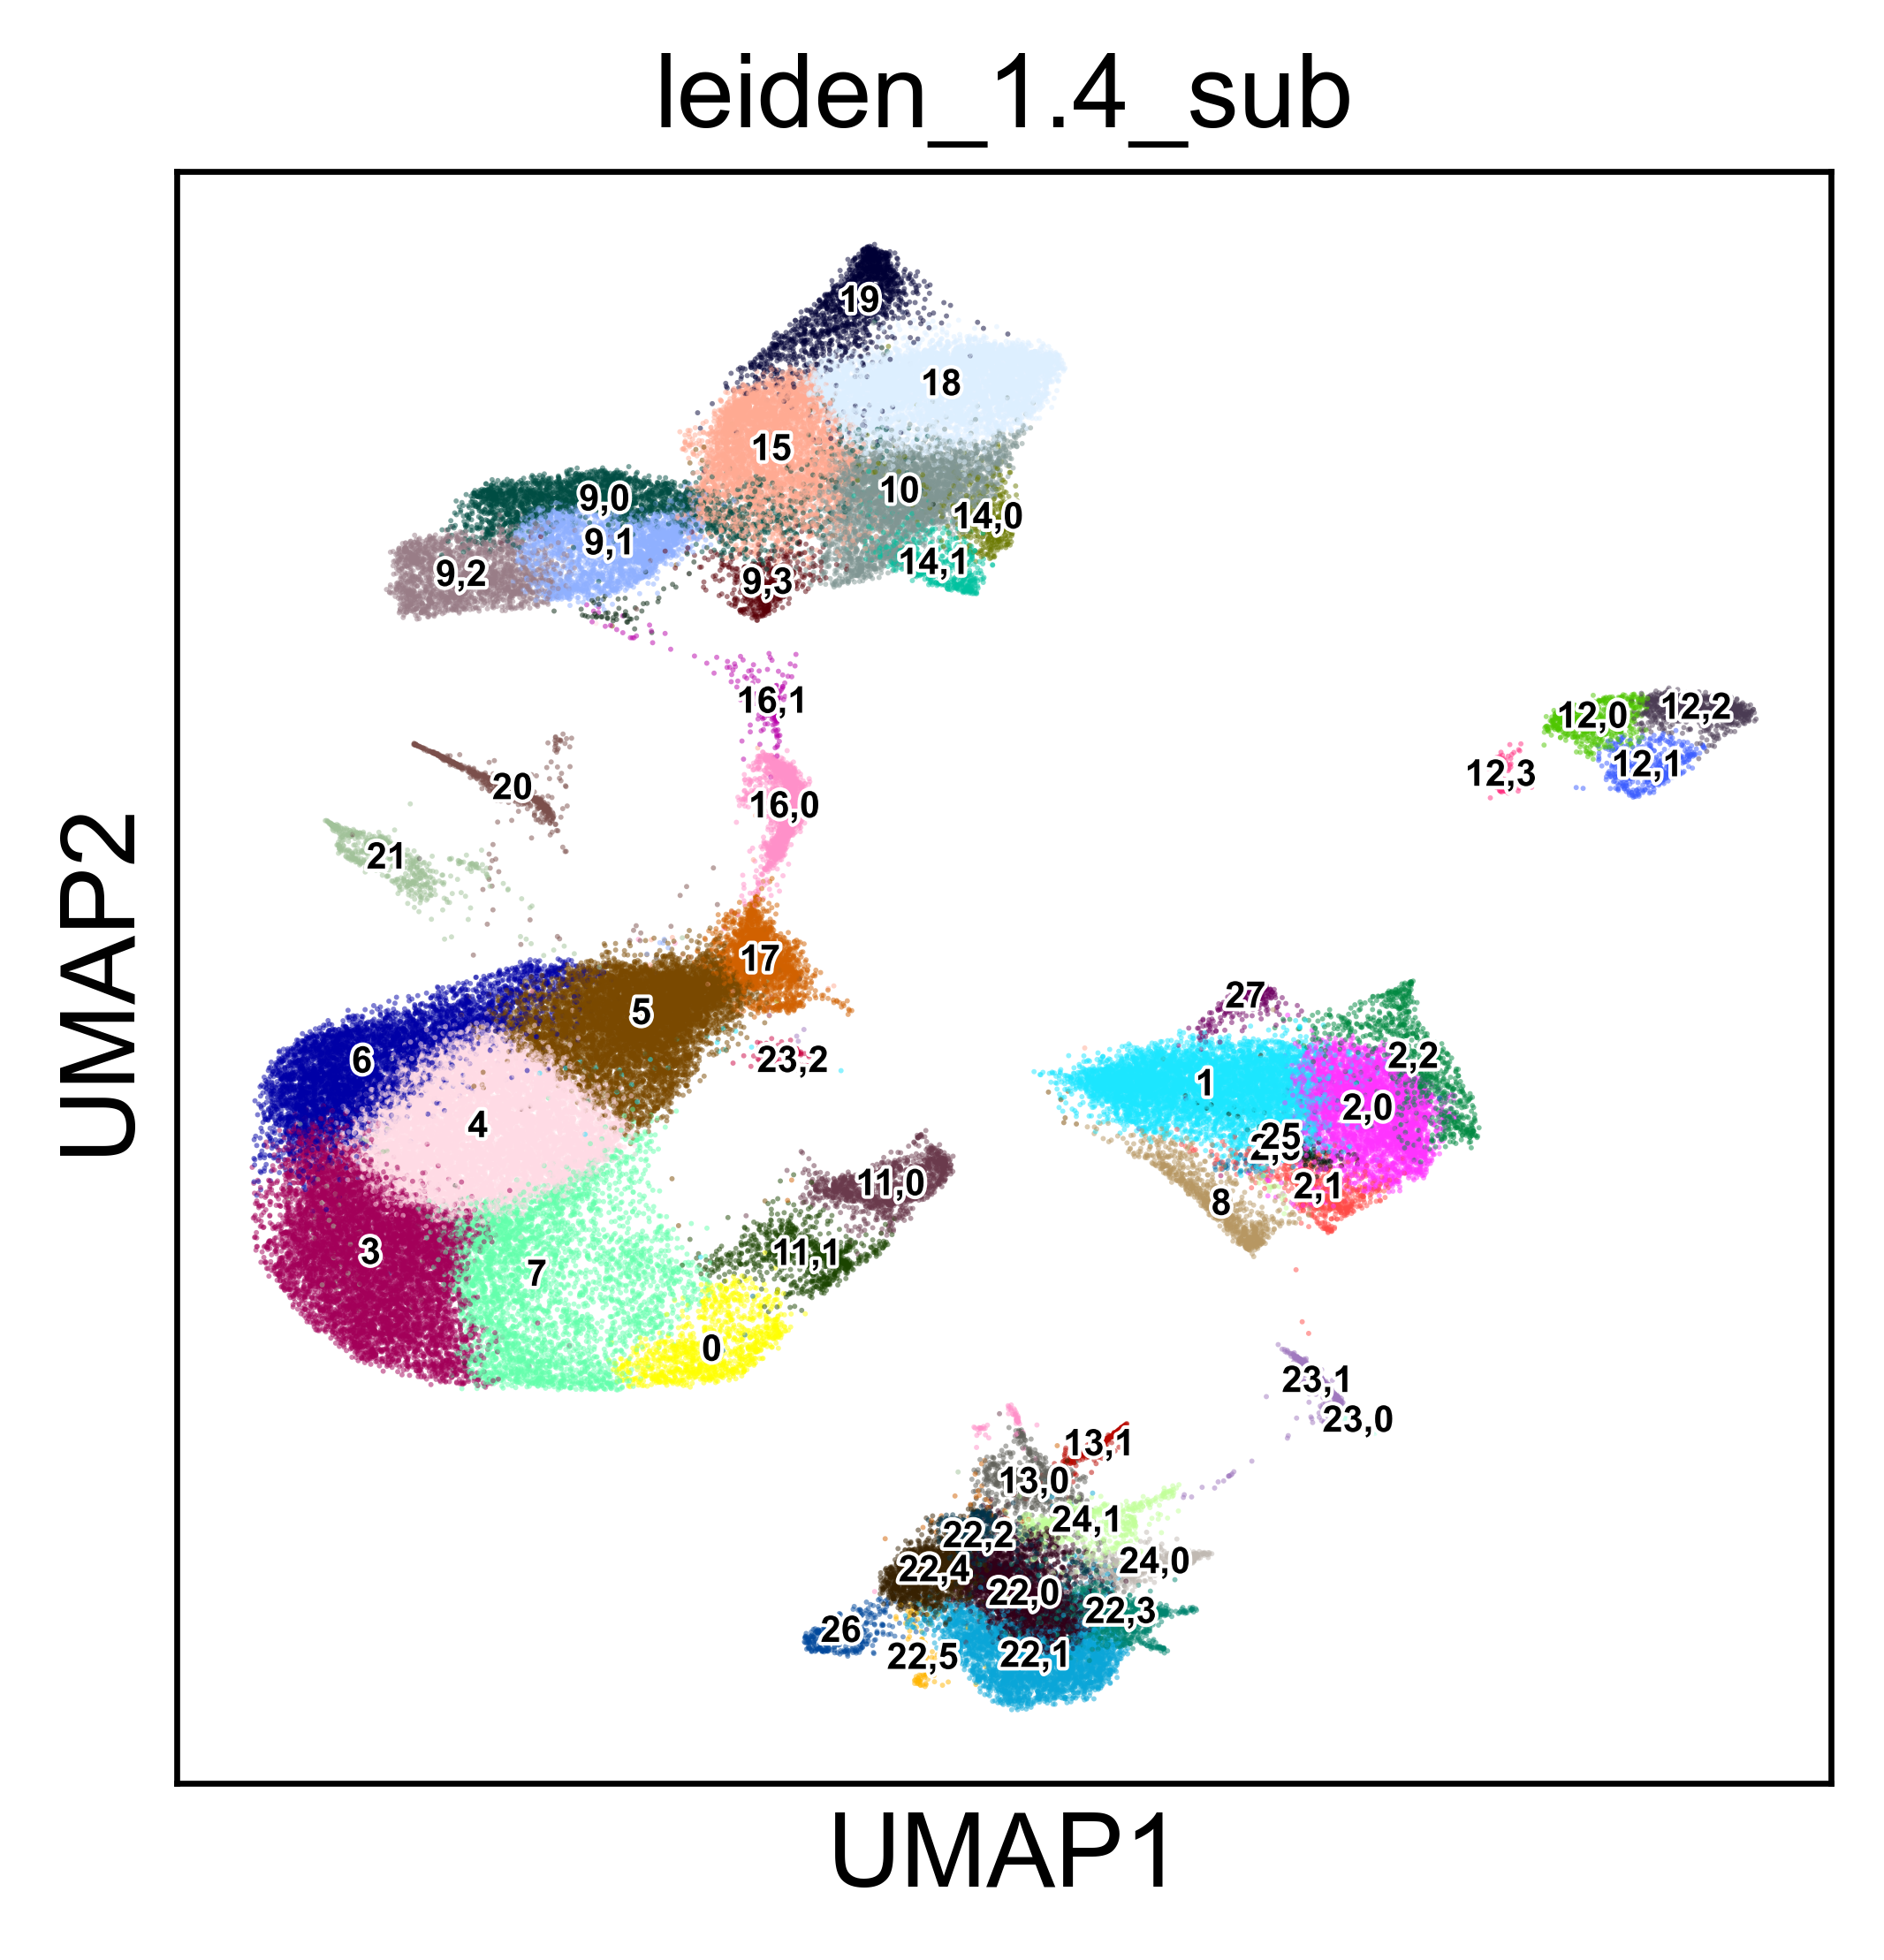

In [8]:
sc.pl.umap(adata, color = ["leiden_1.4_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [17]:
for i, x in enumerate(adata.obs["leiden_1.4_sub"].unique()): 
    print(f'"{x}":"N/A yet ({i})",')

"0":"N/A yet (0)",
"1":"N/A yet (1)",
"3":"N/A yet (2)",
"5":"N/A yet (3)",
"7":"N/A yet (4)",
"2,0":"N/A yet (5)",
"6":"N/A yet (6)",
"8":"N/A yet (7)",
"4":"N/A yet (8)",
"9,0":"N/A yet (9)",
"11,0":"N/A yet (10)",
"2,3":"N/A yet (11)",
"9,1":"N/A yet (12)",
"12,0":"N/A yet (13)",
"13,0":"N/A yet (14)",
"14,0":"N/A yet (15)",
"12,1":"N/A yet (16)",
"10":"N/A yet (17)",
"15":"N/A yet (18)",
"11,1":"N/A yet (19)",
"16,0":"N/A yet (20)",
"17":"N/A yet (21)",
"18":"N/A yet (22)",
"14,1":"N/A yet (23)",
"20":"N/A yet (24)",
"21":"N/A yet (25)",
"9,2":"N/A yet (26)",
"12,2":"N/A yet (27)",
"9,3":"N/A yet (28)",
"22,0":"N/A yet (29)",
"22,3":"N/A yet (30)",
"19":"N/A yet (31)",
"23,0":"N/A yet (32)",
"23,1":"N/A yet (33)",
"24,0":"N/A yet (34)",
"2,1":"N/A yet (35)",
"22,1":"N/A yet (36)",
"25":"N/A yet (37)",
"22,4":"N/A yet (38)",
"16,1":"N/A yet (39)",
"12,3":"N/A yet (40)",
"26":"N/A yet (41)",
"13,1":"N/A yet (42)",
"22,2":"N/A yet (43)",
"22,5":"N/A yet (44)",
"2,2":"N/A yet (45)",
"2

In [22]:
cell_type_dict = {
"0":"Early Immature Neutrophils",
"1":"CD14 Monocytes",
"2,0":"CD14 Monocytes",
"2,1":"CD14CD16 Monocytes",
"2,2":"AML Monocytes 2",
"2,3":"CD14CD16 Monocytes",
"3":"Mature Neutrophils",
"4":"Mature Neutrophils",
"5":"Mature Neutrophils",
"6":"Aged Neutrophils",
"7":"Immature Neutrophils",
"8":"CD16 Monocytes",
"9,0":"Tem/Temra cytotoxic T cells",
"9,1":"Tem/Temra cytotoxic T cells",
"9,2":"NK cells",
"9,3":"Type 1 helper T cells",
"10":"Tem/Effector helper T cells",
"11,0":"Precursors of Neutrophils",
"11,1":"Precursors of Neutrophils",
"12,0":"Naive B cells",
"12,1":"Memory B cells",
"12,2":"Naive B cells",
"12,3":"Plasma cells",
"13,0":"AML Blasts 1",
"13,1":"AML Blasts 2",
"14,0":"Regulatory T cells",
"14,1":"Regulatory T cells",
"15":"Tcm/Naive helper T cells",
"16,0":"Basophils",
"16,1":"Neutropenia (doublets)",
"17":"AML Blasts (low complexity)",
"18":"Tcm/Naive helper T cells",
"19":"Tcm/Naive cytotoxic T cells",
"20":"Erythrocytes",
"21":"Platelets",
"22,0":"AML Blasts 4",
"22,1":"AML Blasts 4",
"22,2":"AML Blasts 4",
"22,3":"AML Blasts 5",
"22,4":"AML Blasts 4",
"22,5":"AML Blasts 7",
"23,0":"Dendritic cells",
"23,1":"Dendritic cells",
"23,2":"Dendritic cells (low complexity)",
"24,0":"AML Blasts 3",
"24,1":"AML Blasts 3",
"25":"CD14 Monocytes",
"26":"AML Blasts 6",
"27":"AML Monocytes 1"
}


In [23]:
adata.obs["cell_type"] = adata.obs["leiden_1.4_sub"].map(cell_type_dict).astype("category")

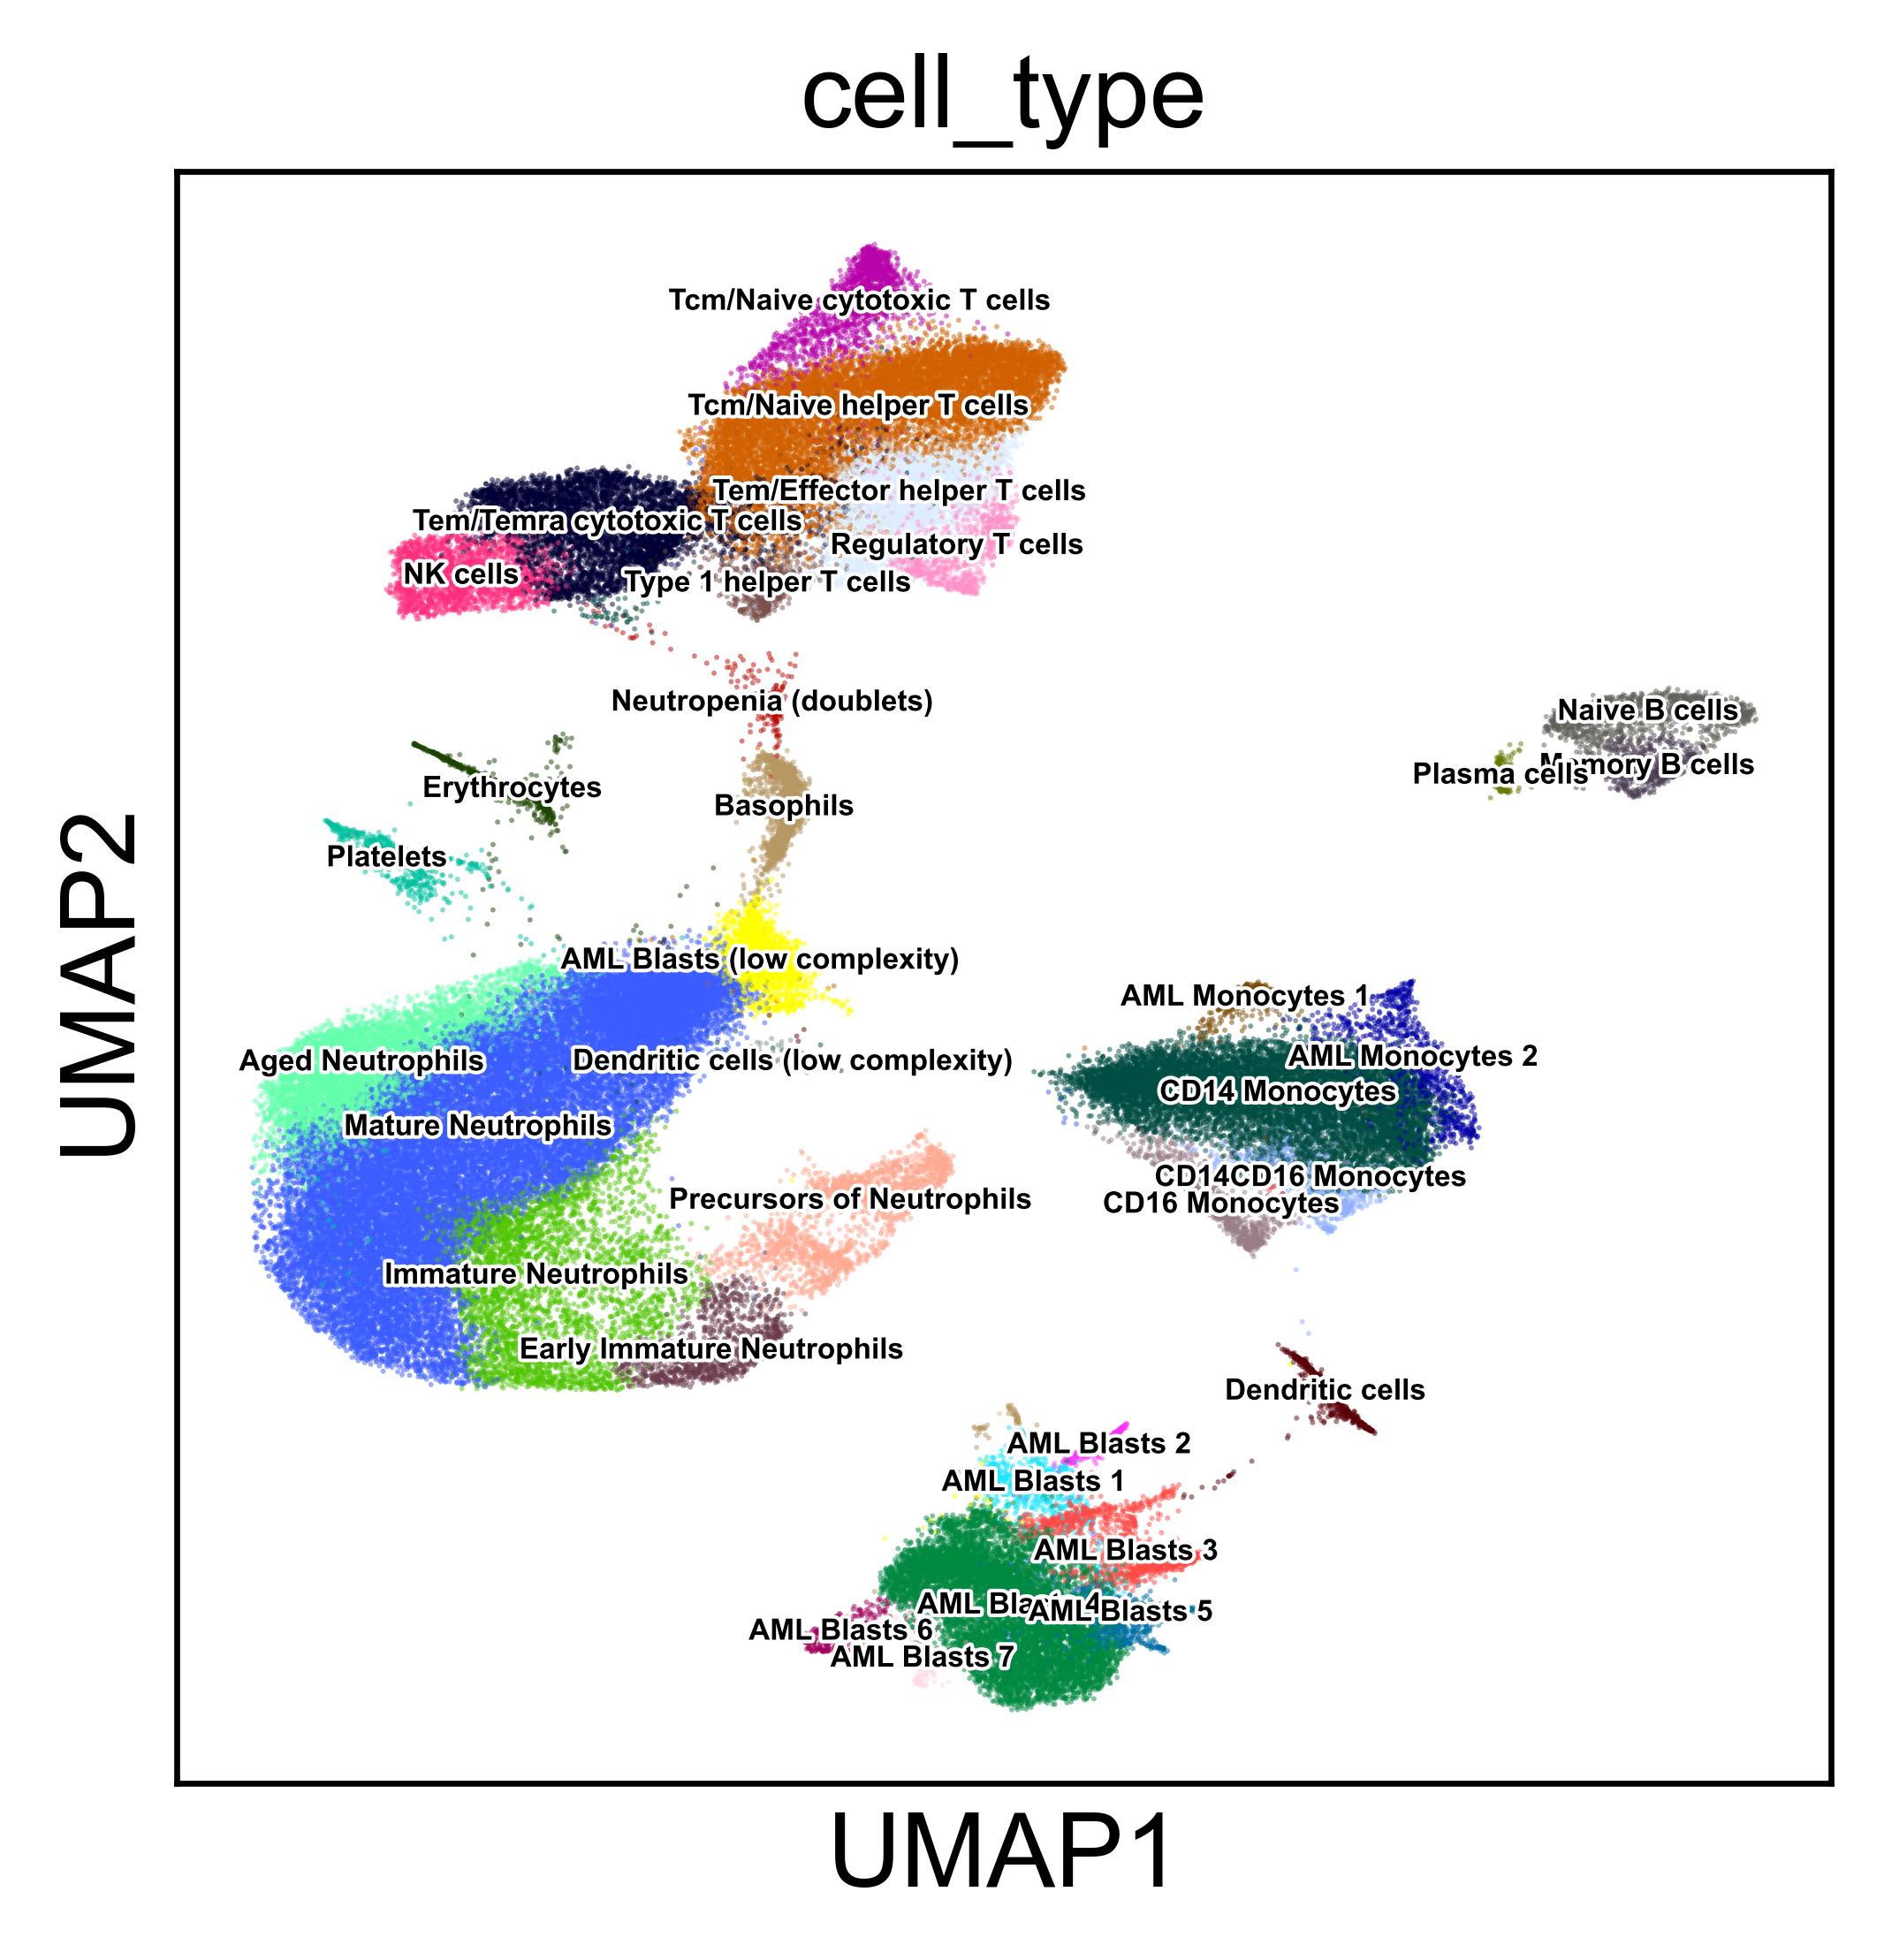

In [24]:
sc.pl.umap(adata, color = ["cell_type"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           legend_loc = "on data", legend_fontsize = 4, legend_fontoutline = True, 
           save = "_cell_type_only_v2.png")

In [25]:
# saving annotated recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/bb2_bb3_leiden_1.4_sub_rec_log_norm_DGE_v1_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_leiden_1.4_sub_rec_log_norm_DGE_v1_annotation_95563x37733_240729_19h05.h5ad


In [26]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/bb2_bb3_obs_info_cell_type_annotation_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_obs_info_cell_type_annotation_95563x31_240729_19h17
1.0197980403900146
